In [ ]:
!pip install -U pip pandas numpy matplotlib

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from glob import glob
import itertools
from functools import lru_cache, cache
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def pairwise(iterable):
    # pairwise('ABCDEFG') --> AB BC CD DE EF FG
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

In [ ]:
path_data = Path(f"./prep")
network_state_path = path_data / f"Etats reseaux telecoms"

measure_df = pd.read_csv(path_data / f"Mesures_exposition_sondes_autonomes.csv", sep=";")
mse_df = pd.read_csv(path_data / f"Dates_mise-en-service_sondes_autonomes.csv", sep=",")

In [ ]:
mse_df.loc[0]["numero sonde"]

'Marseille_01'

In [ ]:
for g in mse_df.loc:
    print(g["numero sonde"])
[f["numero sonde"] fo]

Marseille_01
Marseille_02
Marseille_03
Nantes_01
Nantes_02
Nantes_03
Paris_8e_02
Paris_8e_01
Paris_8e_03
Bordeaux_02
Bordeaux_01
Bordeaux_03
Mérignac_02
Mérignac_01
Mulhouse_03
Mulhouse_01
Mulhouse_02
Talence_01
Bègles_01
Artigues-près-Bordeaux_01
Saint-Aubin-de-Médoc_01
Le Bouscat_01
Saint-Louis-de-Montferrand_01
Bouliac_01
Le Taillan-Médoc_01
Bassens_01
Le-Haillan_01
Villenave-d’Ornon_01
Saint-Médard-En-Jalles_01
Rennes_01
Rennes_05
Rennes_04
Rennes_02
Rennes_03
Bruges_01
Bordeaux_04
Parempuyre_01
Bordeaux_05
Ambares-et-Lagrave_01
Pessac_01
Carbon-Blanc_01
Martignas-sur-Jalle_01
Blanquefort_01
Lille_02
Lille_01
Lille_03
Floirac_01
Ambès_01
Lille_04
Lille_05
Cenon_01
Gradignan_01
Orléans_03
Orléans_01
Orléans_02
Saint-Vincent-de-Paul_01
Orleans_07
Orleans_06
Orleans_05
Orleans_04
Lormont_01
Strasbourg_04
Strasbourg_03
Strasbourg_02
Strasbourg_05
Strasbourg_01
Strasbourg_08
Eysines_01
Rennes_07
Rennes_08
Rennes_10
Rennes_06
Rennes_09
Strasbourg_06
Strasbourg_07


KeyError: 75

# Enrichissement de `measure_df`

In [ ]:
measure_df["datetime"] = [datetime.strptime(d, "%d/%m/%Y %H:%M") for d in measure_df["date"]]
measure_df["weekday"] = [f.weekday() for f in measure_df["datetime"]]
measure_df["month"] = [f.month for f in measure_df["datetime"]]
measure_df["day"] = [f.day for f in measure_df["datetime"]]
measure_df["hour"] = [f.hour for f in measure_df["datetime"]]

In [ ]:
measure_df

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
0,0.93,27/02/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 01:06:00,3,2,27,1
1,0.84,27/02/2020 01:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 01:06:00,3,2,27,1
2,1.33,27/02/2020 01:06,Marseille,13007,31 Chemin de la Batterie des Lions,Marseille_03,43.281023,5.350082,2020-02-27 01:06:00,3,2,27,1
3,0.81,27/02/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 03:06:00,3,2,27,3
4,0.62,27/02/2020 03:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 03:06:00,3,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419956,1.62,05/10/2022 23:06,Le_Taillan-Médoc,33200,86 Avenue du Stade,Le Taillan-Médoc_01,44.916404,-0.683546,2022-10-05 23:06:00,2,10,5,23
419957,0.26,05/10/2022 23:06,Paris,75008,84 Boulevard Haussmann,Paris_8e_03,48.874211,2.324807,2022-10-05 23:06:00,2,10,5,23
419958,0.98,05/10/2022 23:06,Mulhouse,68200,3 Rue Henri Dunant,Mulhouse_02,47.770411,7.320358,2022-10-05 23:06:00,2,10,5,23
419959,0.75,05/10/2022 23:06,Strasbourg,67000,Rue du 22 Novembre,Strasbourg_01,48.582774,7.745277,2022-10-05 23:06:00,2,10,5,23


In [ ]:
network_state_dict = {}
for path in network_state_path.glob("*.csv"):
    date = path.name.split("_Etat reseaux.csv")[0]
    network_state_dict[date] = pd.read_csv(path.absolute(), sep=";")

In [ ]:
print(f"les dates disponibles : {tuple(network_state_dict.keys())}")

les dates disponibles : ('2020_06_30', '2022_03_31', '2022_06_30', '2020_03_31', '2021_12_31', '2020_09_30', '2021_09_30', '2021_03_31', '2022_09_30', '2020_12_31', '2021_06_30')


In [ ]:
network_state_dict["2020_03_31"]

,EMETTEUR ID,DATE MES EMETTEUR,SYSTEME TELECOM,GENERATION TELECOM,ANTENNE ID,AZIMUT ANTENNE,ALTITUDE ANTENNE,NUM STATION ANFR,OPERATEUR,ID SUPPORT,...,COR_NB_MN_LAT,COR_NB_SC_LAT,COR_CD_NS_LAT,COR_NB_DG_LON,COR_NB_MN_LON,COR_NB_SC_LON,COR_CD_EW_LON,LATITUDE DD,LONGITUDE DD,NUMERO SONDE FIXE
0,2311395,15/05/1994,GSM 900,2G,239926,150.0,"32,8",132290036,ORANGE,759406,...,17,33,N,5,22,36,E,43.292500,5.376667,Marseille_02
1,2311401,15/05/1994,GSM 900,2G,239928,30.0,"32,8",132290036,ORANGE,759406,...,17,33,N,5,22,36,E,43.292500,5.376667,Marseille_02
2,2311407,15/05/1994,GSM 900,2G,239930,270.0,"32,8",132290036,ORANGE,759406,...,17,33,N,5,22,36,E,43.292500,5.376667,Marseille_02
3,2973898,23/06/1995,GSM 900,2G,2617665,0.0,31,132700319,SFR,449181,...,17,26,N,5,22,26,E,43.290556,5.373889,Marseille_02
4,2973908,23/06/1995,GSM 900,2G,2617667,240.0,31,132700319,SFR,449181,...,17,26,N,5,22,26,E,43.290556,5.373889,Marseille_02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,11995457,15/01/2020,UMTS 2100,3G,5713308,260.0,"27,6",442750630,BOUYGUES TELECOM,2136870,...,12,23,N,1,34,27,W,47.206389,-1.574167,Nantes_02
701,11995475,15/01/2020,UMTS 2100,3G,5713310,80.0,"27,6",442750630,BOUYGUES TELECOM,2136870,...,12,23,N,1,34,27,W,47.206389,-1.574167,Nantes_02
702,11995447,15/01/2020,UMTS 900,3G,5713306,350.0,"27,6",442750630,BOUYGUES TELECOM,2136870,...,12,23,N,1,34,27,W,47.206389,-1.574167,Nantes_02
703,11995461,15/01/2020,UMTS 900,3G,5713308,260.0,"27,6",442750630,BOUYGUES TELECOM,2136870,...,12,23,N,1,34,27,W,47.206389,-1.574167,Nantes_02


# Afficher une sonde

In [ ]:
sonde = f"Marseille_{1:0>2}"

In [ ]:
measure_df

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
0,0.93,27/02/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 01:06:00,3,2,27,1
1,0.84,27/02/2020 01:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 01:06:00,3,2,27,1
2,1.33,27/02/2020 01:06,Marseille,13007,31 Chemin de la Batterie des Lions,Marseille_03,43.281023,5.350082,2020-02-27 01:06:00,3,2,27,1
3,0.81,27/02/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 03:06:00,3,2,27,3
4,0.62,27/02/2020 03:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 03:06:00,3,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419956,1.62,05/10/2022 23:06,Le_Taillan-Médoc,33200,86 Avenue du Stade,Le Taillan-Médoc_01,44.916404,-0.683546,2022-10-05 23:06:00,2,10,5,23
419957,0.26,05/10/2022 23:06,Paris,75008,84 Boulevard Haussmann,Paris_8e_03,48.874211,2.324807,2022-10-05 23:06:00,2,10,5,23
419958,0.98,05/10/2022 23:06,Mulhouse,68200,3 Rue Henri Dunant,Mulhouse_02,47.770411,7.320358,2022-10-05 23:06:00,2,10,5,23
419959,0.75,05/10/2022 23:06,Strasbourg,67000,Rue du 22 Novembre,Strasbourg_01,48.582774,7.745277,2022-10-05 23:06:00,2,10,5,23


In [ ]:
measure_df[measure_df["numero"]==sonde]

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
0,0.93,27/02/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-02-27 01:06:00,3,2,27,1
3,0.81,27/02/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-02-27 03:06:00,3,2,27,3
6,0.90,27/02/2020 07:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-02-27 07:06:00,3,2,27,7
9,1.16,27/02/2020 09:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-02-27 09:06:00,3,2,27,9
12,1.34,27/02/2020 11:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-02-27 11:06:00,3,2,27,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419617,1.17,05/10/2022 15:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 15:06:00,2,10,5,15
419690,1.18,05/10/2022 17:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 17:06:00,2,10,5,17
419763,1.12,05/10/2022 19:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 19:06:00,2,10,5,19
419836,1.11,05/10/2022 21:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 21:06:00,2,10,5,21


In [ ]:
timestamps = measure_df["date"]
print(len(timestamps))
print(len(set(timestamps)))
print(len(timestamps))


419961
21700
419961


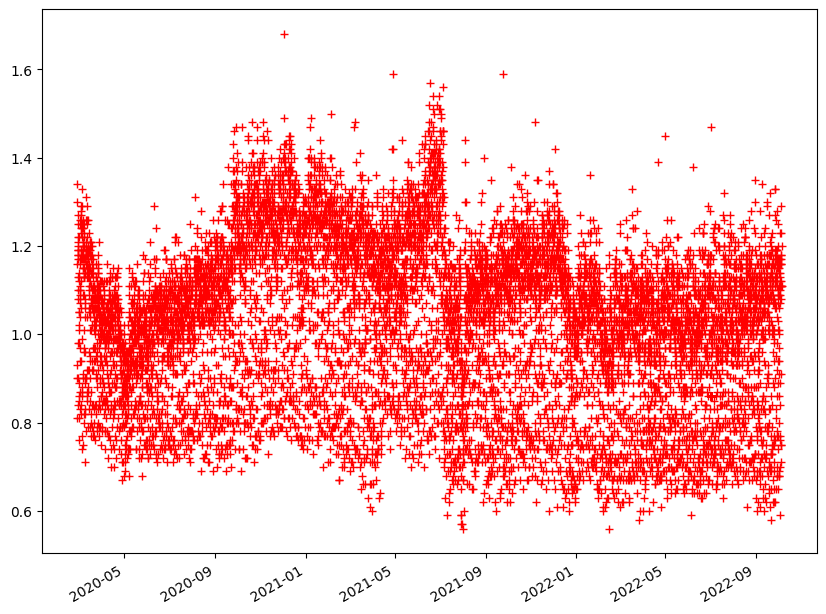

In [ ]:
plt.figure(figsize=(10, 8))
DF = pd.DataFrame()
DF['value'] = measure_df[measure_df["numero"]==sonde]["E_volt_par_metre"]
DF = DF.set_index(measure_df[measure_df["numero"]==sonde]["datetime"])
plt.plot(DF, 'r+')
plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
dt = measure_df[measure_df["numero"]==sonde]["datetime"][0]
dt.weekday()

3

In [ ]:
measure_df["weekday"]==2

0         False
1         False
2         False
3         False
4         False
          ...  
419956     True
419957     True
419958     True
419959     True
419960     True
Name: weekday, Length: 419961, dtype: bool

In [ ]:
((measure_df["numero"]==sonde) & (measure_df["weekday"]==2)).sum()

1563

In [ ]:
measure_df[(measure_df["numero"]==sonde) & (measure_df["weekday"]==2)]

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
199,0.99,04/03/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-04 01:06:00,2,3,4,1
205,0.74,04/03/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-04 03:06:00,2,3,4,3
211,0.87,04/03/2020 07:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-04 07:06:00,2,3,4,7
217,1.18,04/03/2020 09:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-04 09:06:00,2,3,4,9
223,1.24,04/03/2020 11:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2020-03-04 11:06:00,2,3,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419617,1.17,05/10/2022 15:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 15:06:00,2,10,5,15
419690,1.18,05/10/2022 17:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 17:06:00,2,10,5,17
419763,1.12,05/10/2022 19:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 19:06:00,2,10,5,19
419836,1.11,05/10/2022 21:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.30439,5.367127,2022-10-05 21:06:00,2,10,5,21


Text(0.5, 1.0, 'evolution sonde Marseille_01 en fonction jour de la semaine')

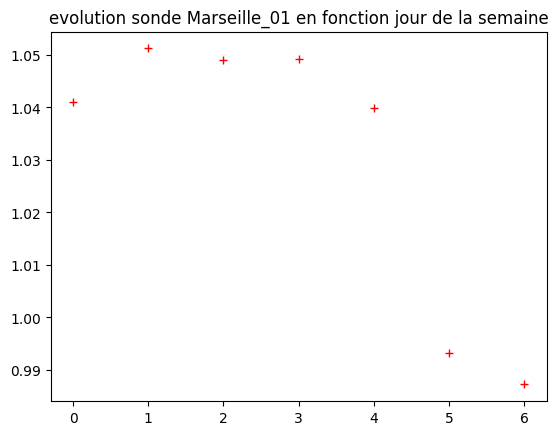

In [ ]:
xrange = tuple(range(7))
res = []
for x in xrange:
    res.append(measure_df[(measure_df["numero"]==sonde) & (measure_df["weekday"]==x)]["E_volt_par_metre"].mean())
plt.plot(xrange, res, "r+")
plt.title(f"evolution sonde {sonde} en fonction jour de la semaine")

Text(0.5, 1.0, 'evolution moyenne toutes les sondes en fonction jour de la semaine')

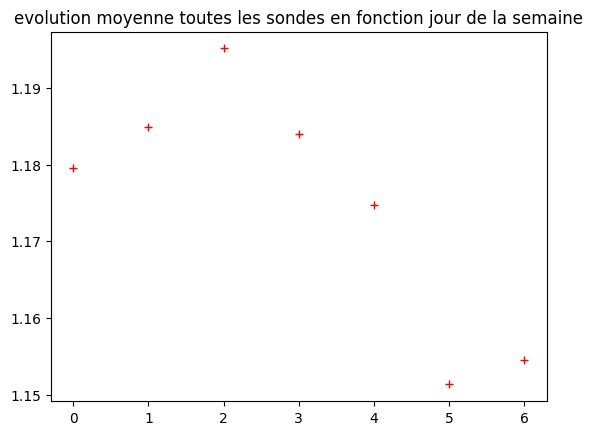

In [ ]:
xrange = tuple(range(7))
res = []
for x in xrange:
    res.append(measure_df[(measure_df["weekday"]==x)]["E_volt_par_metre"].mean())
plt.plot(xrange, res, "r+")
plt.title(f"evolution moyenne toutes les sondes en fonction jour de la semaine")

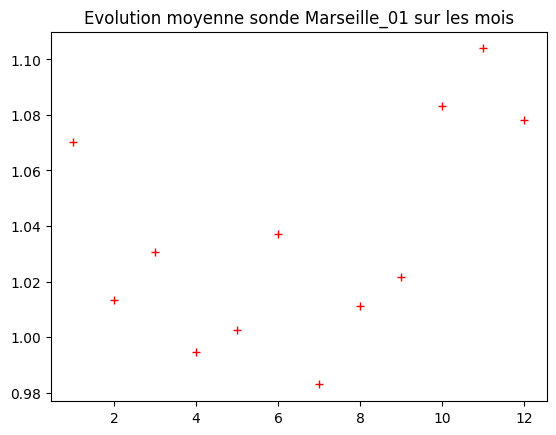

In [ ]:
plt.title(f"Evolution moyenne sonde {sonde} sur les mois")
xrange=np.sort(measure_df["month"].unique()) # == range(1, 13)
plt.plot(xrange, [measure_df[(measure_df["numero"]==sonde) & (measure_df["month"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")

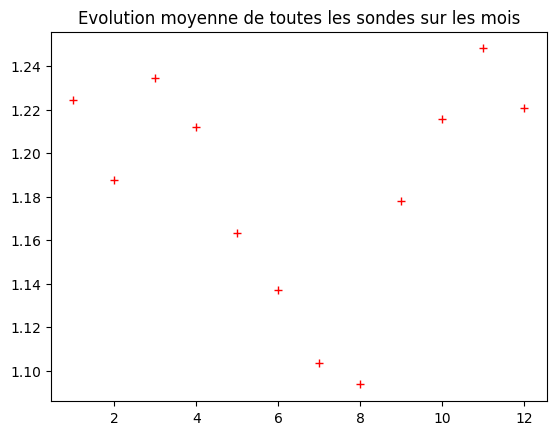

In [ ]:
plt.title(f"Evolution moyenne de toutes les sondes sur les mois")
xrange=np.sort(measure_df["month"].unique()) # == range(1, 13)
plt.plot(xrange, [measure_df[(measure_df["month"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")

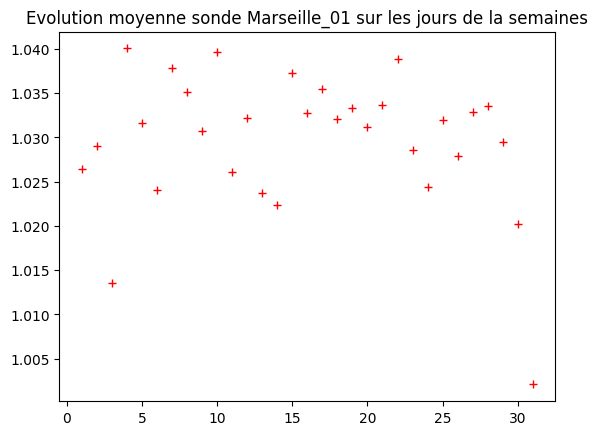

In [ ]:
plt.title(f"Evolution moyenne sonde {sonde} sur les jours de la semaines")
xrange=np.sort(measure_df["day"].unique()) # == range(1, 31 + 1)
plt.plot(xrange, [measure_df[(measure_df["numero"]==sonde) & (measure_df["day"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")

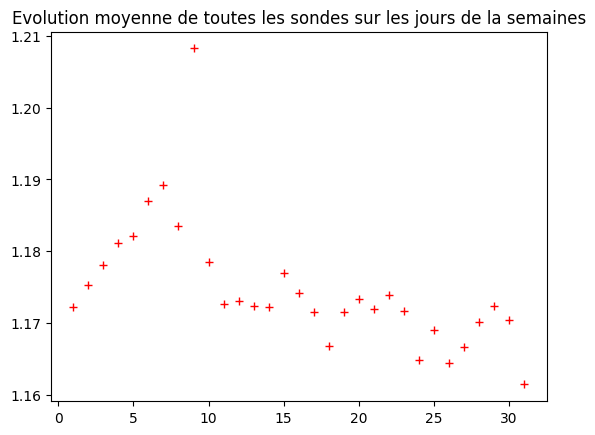

In [ ]:
plt.title(f"Evolution moyenne de toutes les sondes sur les jours de la semaines")
xrange=np.sort(measure_df["day"].unique()) # == range(1, 31 + 1)
plt.plot(xrange, [measure_df[(measure_df["day"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")

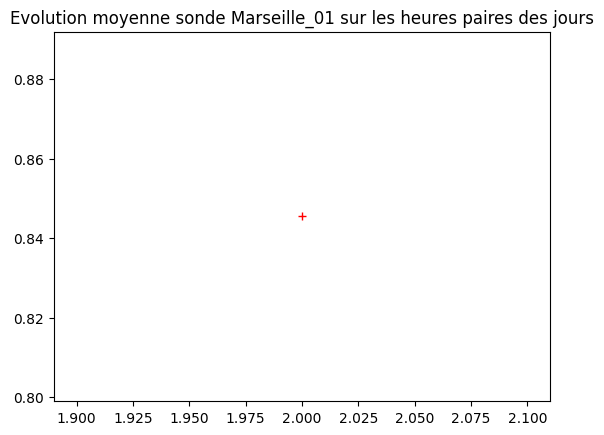

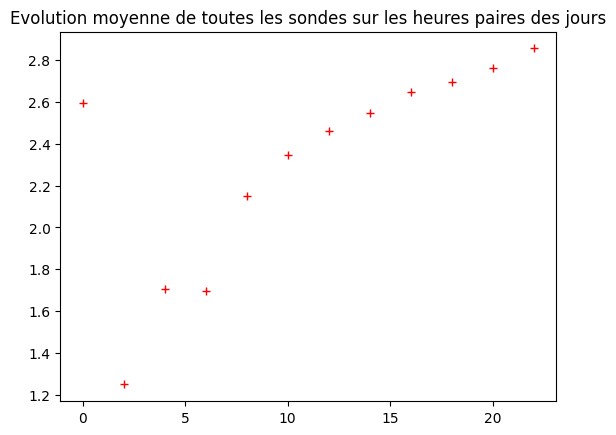

In [ ]:
plt.title(f"Evolution moyenne sonde {sonde} sur les heures paires des jours")
xrange = tuple(range(0, 24, 2))
plt.plot(xrange, [measure_df[(measure_df["numero"]==sonde) & (measure_df["hour"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")
plt.show()
plt.title(f"Evolution moyenne de toutes les sondes sur les heures paires des jours")
plt.plot(xrange, [measure_df[(measure_df["hour"]==x)]["E_volt_par_metre"].mean() for x in xrange], "r+")

In [ ]:
xrange, np.sort(measure_df["hour"].unique()) 

((0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]))

In [ ]:
from itertools import zip_longest

def grouper(iterable, n, fillvalue=None):
    """Collect data into fixed-length chunks or blocks.

    >>> grouper('ABCDEFG', 3, 'x')
    ['ABC', 'DEF', 'Gxx']
    """
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

In [ ]:
tuple(grouper(range(24), 2))

((0, 1),
 (2, 3),
 (4, 5),
 (6, 7),
 (8, 9),
 (10, 11),
 (12, 13),
 (14, 15),
 (16, 17),
 (18, 19),
 (20, 21),
 (22, 23))

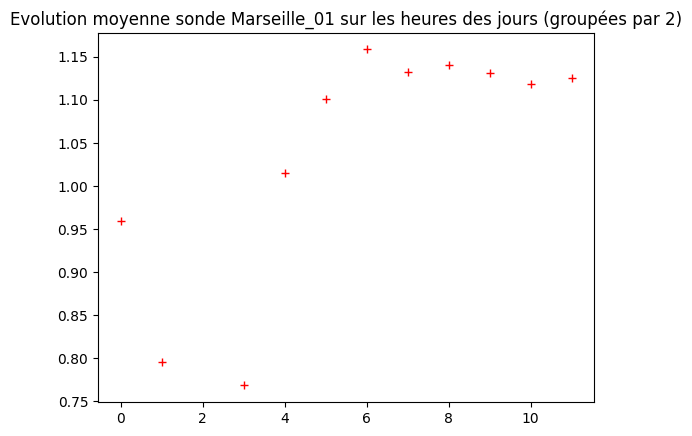

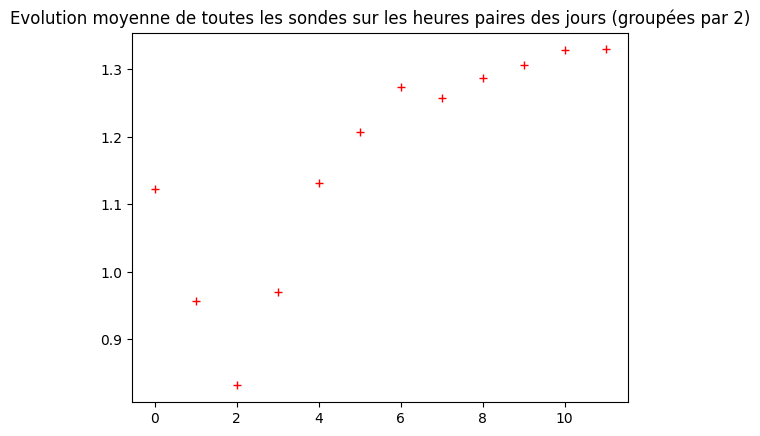

In [ ]:
plt.title(f"Evolution moyenne sonde {sonde} sur les heures des jours (groupées par 2)")
bins = tuple(grouper(range(24), 2))
xrange = range(len(bins))
plt.plot(xrange, [measure_df[(measure_df["numero"]==sonde) & ((measure_df["hour"]==bin_[0]) | (measure_df["hour"]==bin_[1]))]["E_volt_par_metre"].mean() for bin_ in bins], "r+")
plt.show()
plt.title(f"Evolution moyenne de toutes les sondes sur les heures paires des jours (groupées par 2)")
plt.plot(xrange, [measure_df[((measure_df["hour"]==bin_[0]) | (measure_df["hour"]==bin_[1]))]["E_volt_par_metre"].mean() for bin_ in bins], "r+")

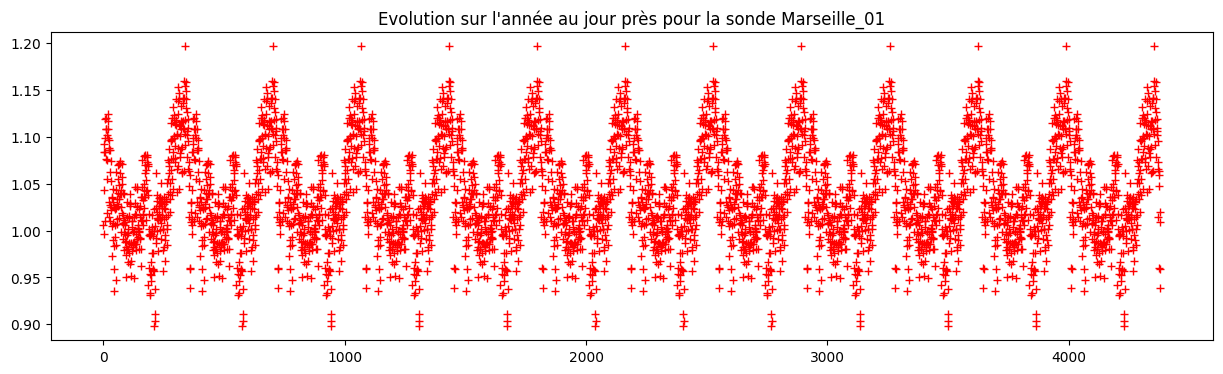

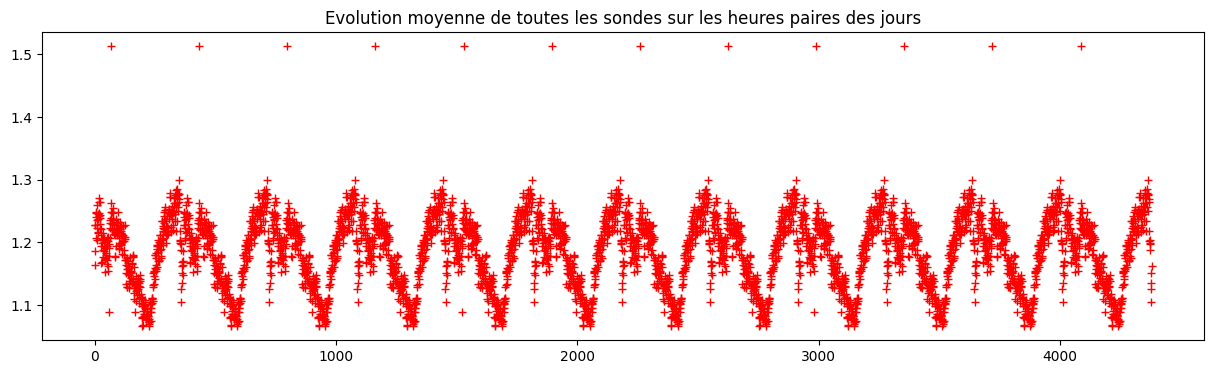

In [ ]:
plt.figure(figsize=(15, 4))
plt.title(f"Evolution sur l'année au jour près pour la sonde {sonde}")
xrange = tuple(range(365*12))
@cache
def getDayMonthFromidx(idx:int):
    datetime_ = datetime(2020, 1, 1) + idx * timedelta(hours=24) #idx indique le jour de l'année
    return datetime_.day, datetime_.month
day_month = [getDayMonthFromidx(i) for i in xrange]
@cache
def ys_nmd():
    return [measure_df[(measure_df["numero"]==sonde) & (measure_df["month"]==month) & (measure_df["day"]==day)]["E_volt_par_metre"].mean() for day, month in day_month]
def ys_md():
    return [measure_df[(measure_df["month"]==month) & (measure_df["day"]==day)]["E_volt_par_metre"].mean() for day, month in day_month]
plt.plot(xrange, ys_nmd(), "r+")
plt.show()
plt.figure(figsize=(15, 4))
plt.title(f"Evolution moyenne de toutes les sondes sur les heures paires des jours")
plt.plot(xrange, ys_md(), "r+")

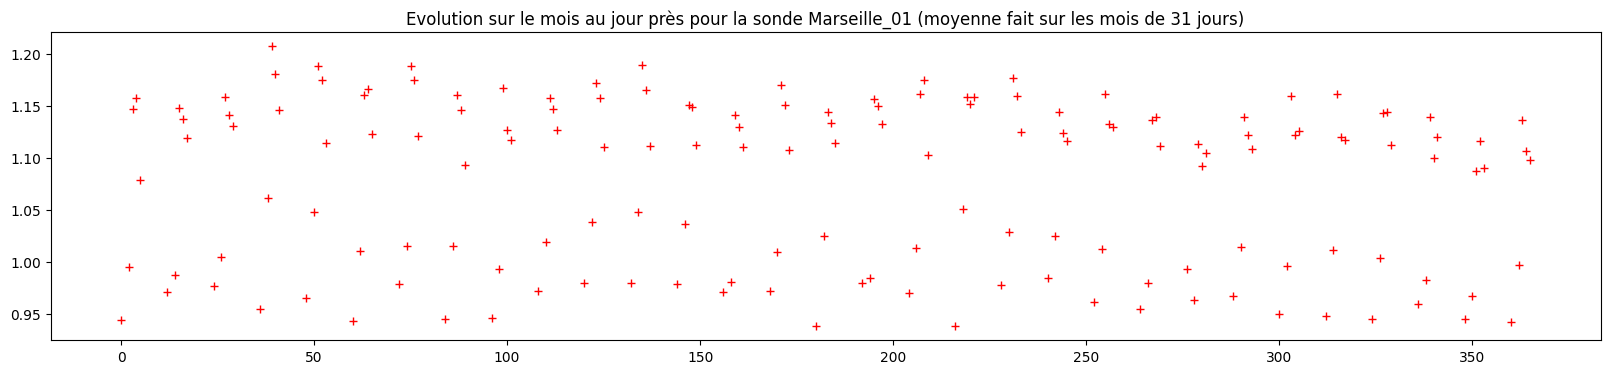

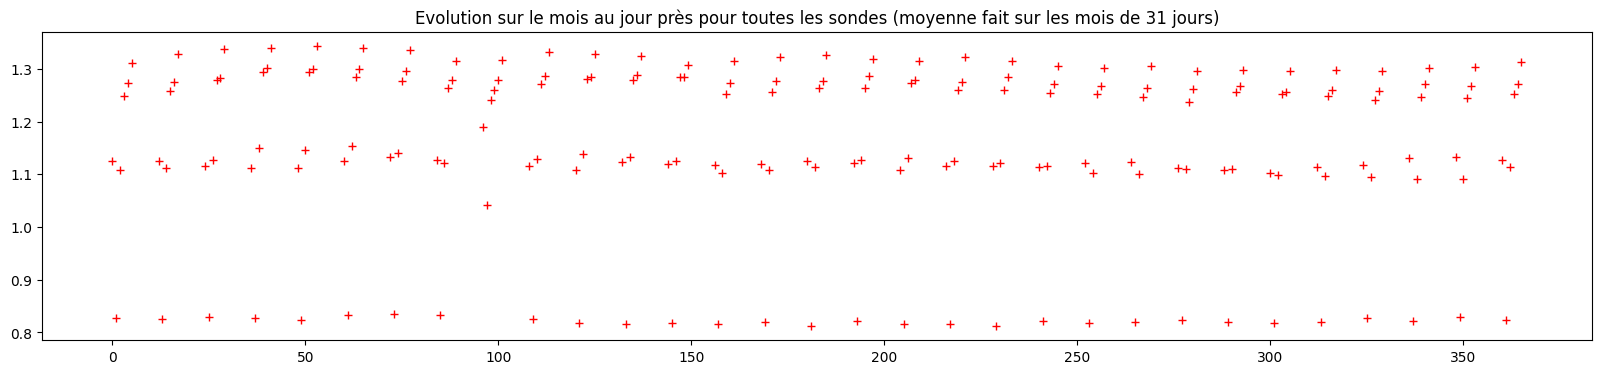

In [ ]:
plt.figure(figsize=(20, 4))
plt.title(f"Evolution sur le mois au jour près pour la sonde {sonde} (moyenne fait sur les mois de 31 jours)")
month_31_range = (1, 3, 5, 7, 8, 10, 12)
xrange = tuple(range(31*12))
@cache
def getDayHourFromidx_month31(idx:int):
    datetime_ = datetime(2020, 1, 1) + idx * timedelta(hours=2) # on se place en janvier pour mois de 31 jours
    return datetime_.day, datetime_.hour

day_hour = [getDayHourFromidx_month31(i) for i in xrange]

bool_measure_df_month_31 = np.zeros(len(measure_df))
for month_31 in month_31_range:
    bool_measure_df_month_31 = bool_measure_df_month_31 | (measure_df["month"] == month_31)

@cache
def get_months_nhd():
    return [measure_df[(measure_df["numero"]==sonde) & bool_measure_df_month_31 & ((measure_df["hour"]==2*hour)| (measure_df["hour"]==2*hour+1)) & (measure_df["day"]==day)]["E_volt_par_metre"].mean() for day, hour in day_hour]

@cache
def get_months_hd():
    return [measure_df[bool_measure_df_month_31 & ((measure_df["hour"]==hour) | (measure_df["hour"]==hour+1)) & (measure_df["day"]==day)]["E_volt_par_metre"].mean() for day, hour in day_hour]


plt.plot(xrange, get_months_nhd(), "r+")
plt.show()
plt.figure(figsize=(20, 4))
plt.title(f"Evolution sur le mois au jour près pour toutes les sondes (moyenne fait sur les mois de 31 jours)")
plt.plot(xrange, get_months_hd(), "r+")

Text(0.5, 1.0, 'evolution sonde Marseille_01 en fonction jour de la semaine')

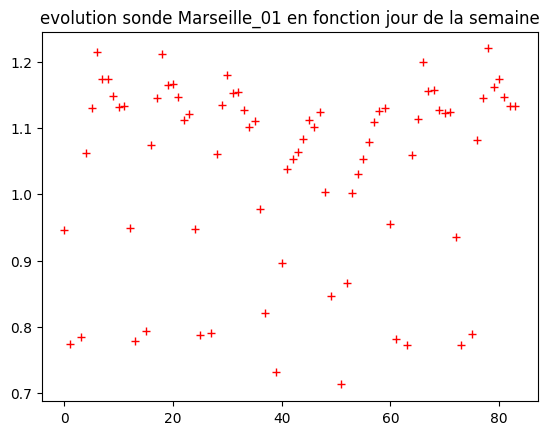

In [ ]:
xrange = tuple(range(7 * 12))

def getDatetimeFromidx(idx:int):
    datetime_ = datetime(2020, 1, 1) + idx * timedelta(hours=2) # on se place en janvier pour mois de 31 jours
    return datetime_

res = []
for x in xrange:
    datetime_ = getDatetimeFromidx(x)
    res.append(measure_df[(measure_df["numero"]==sonde) & (measure_df["weekday"]==datetime_.weekday()) & ((measure_df["hour"]==datetime_.hour) | (measure_df["hour"]==datetime_.hour+1))]["E_volt_par_metre"].mean())
plt.plot(xrange, res, "r+")
plt.title(f"evolution sonde {sonde} en fonction jour de la semaine")

In [ ]:
(measure_df["numero"]=="eza").sum()

0

In [ ]:
((measure_df["weekday"]==datetime_.weekday()) & ((measure_df["hour"]==datetime_.hour) | (measure_df["hour"]==datetime_.hour+1))).sum()

5127

In [ ]:
datetime_.weekday()

1

In [ ]:
measure_df[bool_measure_df_month_31]["hour"].unique()

array([ 1,  3,  7,  9, 11, 13, 15, 17, 19, 21, 23,  5,  4,  8, 10, 12, 14,
       16, 18, 20, 22,  0,  2,  6])

In [ ]:
len(measure_df["day"]!=133)

419961

In [ ]:
measure_df

,E_volt_par_metre,date,ville,code_postal,adresse,numero,latitude,longitude,datetime,weekday,month,day,hour
0,0.93,27/02/2020 01:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 01:06:00,3,2,27,1
1,0.84,27/02/2020 01:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 01:06:00,3,2,27,1
2,1.33,27/02/2020 01:06,Marseille,13007,31 Chemin de la Batterie des Lions,Marseille_03,43.281023,5.350082,2020-02-27 01:06:00,3,2,27,1
3,0.81,27/02/2020 03:06,Marseille,13002,66 Avenue Robert Schuman,Marseille_01,43.304390,5.367127,2020-02-27 03:06:00,3,2,27,3
4,0.62,27/02/2020 03:06,Marseille,13006,Cours Pierre Puget,Marseille_02,43.290324,5.374826,2020-02-27 03:06:00,3,2,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
419956,1.62,05/10/2022 23:06,Le_Taillan-Médoc,33200,86 Avenue du Stade,Le Taillan-Médoc_01,44.916404,-0.683546,2022-10-05 23:06:00,2,10,5,23
419957,0.26,05/10/2022 23:06,Paris,75008,84 Boulevard Haussmann,Paris_8e_03,48.874211,2.324807,2022-10-05 23:06:00,2,10,5,23
419958,0.98,05/10/2022 23:06,Mulhouse,68200,3 Rue Henri Dunant,Mulhouse_02,47.770411,7.320358,2022-10-05 23:06:00,2,10,5,23
419959,0.75,05/10/2022 23:06,Strasbourg,67000,Rue du 22 Novembre,Strasbourg_01,48.582774,7.745277,2022-10-05 23:06:00,2,10,5,23


In [ ]:
dfs = []
for date, df in network_state_dict.items():
    df["date"] = date
    dfs.append(df)
network_state_df = pd.concat(dfs)
network_state_df.head()

,EMETTEUR ID,DATE MES EMETTEUR,SYSTEME TELECOM,GENERATION TELECOM,ANTENNE ID,AZIMUT ANTENNE,ALTITUDE ANTENNE,NUM STATION ANFR,OPERATEUR,ID SUPPORT,...,COR_NB_SC_LAT,COR_CD_NS_LAT,COR_NB_DG_LON,COR_NB_MN_LON,COR_NB_SC_LON,COR_CD_EW_LON,LATITUDE DD,LONGITUDE DD,NUMERO SONDE FIXE,date
0,2311395,15/05/1994,GSM 900,2G,239926,150.0,"32,8",132290036,ORANGE,759406,...,33,N,5,22,36,E,43.292500,5.376667,Marseille_02,2020_06_30
1,2311401,15/05/1994,GSM 900,2G,239928,30.0,"32,8",132290036,ORANGE,759406,...,33,N,5,22,36,E,43.292500,5.376667,Marseille_02,2020_06_30
2,2311407,15/05/1994,GSM 900,2G,239930,270.0,"32,8",132290036,ORANGE,759406,...,33,N,5,22,36,E,43.292500,5.376667,Marseille_02,2020_06_30
3,2973898,23/06/1995,GSM 900,2G,2617665,0.0,31,132700319,SFR,449181,...,26,N,5,22,26,E,43.290556,5.373889,Marseille_02,2020_06_30
4,2973908,23/06/1995,GSM 900,2G,2617667,240.0,31,132700319,SFR,449181,...,26,N,5,22,26,E,43.290556,5.373889,Marseille_02,2020_06_30


In [ ]:
emitters = list(set(network_state_df["EMETTEUR ID"]))
print(len(emitters), "émetteurs distincts")

sondes = list(set(measure_df["numero"]))
print(len(sondes), "sondes distinctes")

antennas = list(set(network_state_df["ANTENNE ID"]))
print(len(antennas), "antennes distinctes")

9832 émetteurs distincts
75 sondes distinctes
1842 antennes distinctes


In [ ]:
datetimes = list(set(measure_df["datetime"]))
print(len(datetimes), "datetimes distincts")
trimesters = list(sorted(set(network_state_dict.keys())))
print(trimesters)

21700 datetimes distincts
['2020_03_31', '2020_06_30', '2020_09_30', '2020_12_31', '2021_03_31', '2021_06_30', '2021_09_30', '2021_12_31', '2022_03_31', '2022_06_30', '2022_09_30']


In [ ]:
activity_df = pd.DataFrame(columns=antennas, index=trimesters).fillna(0).astype(bool)
activity_df
@cache
def activity_df_calculator():
    for trimester in trimesters:
        for antenna in antennas:
            # print(list(network_state_dict[trimester]["EMETTEUR ID"]))
            if antenna in list(network_state_dict[trimester]["ANTENNE ID"]):
                activity_df[antenna][trimester] = True
activity_df_calculator()
activity_df

,5013509,3620873,3620875,3620877,2703380,2703382,4030498,4030500,4030502,4956212,...,2498443,6750109,6750111,6750113,6545345,6545347,6545349,2908111,2908113,2908115
2020_03_31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020_06_30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020_09_30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020_12_31,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2021_03_31,False,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2021_06_30,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2021_09_30,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,True,False,False,False
2021_12_31,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,True,True,True,False,False,False
2022_03_31,True,True,True,True,True,True,True,True,True,True,...,True,False,False,False,True,True,True,True,True,True
2022_06_30,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
activity_df_t = activity_df.transpose()
# activity_df_t

In [ ]:
network_state_df["datetime"] = []

In [ ]:
def is_antenna_active(antenna, dt):
    last_activity = None
    for trimester in trimesters:
        trimester_dt = datetime.strptime(trimester, "%Y_%m_%d")
        print(trimester_dt, dt)
        if trimester_dt > dt:
            break
        last_activity = activity_df[antenna][trimester]
    return last_activity

dt = np.random.choice(measure_df["datetime"])
antenna = 4030498
print(dt)

print(f"antenna {antenna} was {'not' if not is_antenna_active(antenna, dt) else ''} active at {dt}")

2022-04-20T23:06:00.000000000
2020-03-31 00:00:00 2022-04-20T23:06:00.000000000


TypeError: '<' not supported between instances of 'int' and 'datetime.datetime'

In [ ]:
print("salut")

In [ ]:
conn = psycopg2.connect(
    host="postgres_frhack",
    database="db",
    user="user",
    password="password")
conn = 